### Using Numpy & Sympy: Case Study
(created by Chenkuan Liu; this notebook can also be found at https://github.com/ck44liu/scientific-computing-python-notes/tree/main/Note2)

In previous homework, there was a problem asking the expression of the plane given three points in $\mathbb{R}^3$. The key to this problem is to set up the expression $ax+by+cz+d=0$ (some places write it as $ax+by+cz=d$, but having $d$ on the left side will make it more straightforward in this problem), and then plug in the points to solve the linear system.

At here, we are going to extend and look at this problem from both mathematical and scientific programming perspectives. Without further ado, let's import the libraries:

In [1]:
import numpy as np
import sympy

#### Example Demo

Let's say we want to determine the plane containing the points $(1,-2,4)$, $(-2,5,-3)$, and $(2,-3,7)$. After plugging them into $ax+by+cz+d=0$, we get the following system:  (note that we are plugging into $x,y,z$ and trying to solve for $a,b,c,d$ )

$$a-2b+4c+d=0$$
$$-2a+5b-3c+d=0$$
$$2a-3b-7c+d=0$$

To solve this linear system, it's better to look at its reduced row echelon form. At here, we can use numpy and sympy to do this:

In [2]:
# initializing coefficient matrix
M = np.array([[1,-2,4,1],[-2,5,-3,1],[2,-3,7,1]])
M

array([[ 1, -2,  4,  1],
       [-2,  5, -3,  1],
       [ 2, -3,  7,  1]])

In [3]:
# using sympy to compute its rref
M = sympy.Matrix(M)
M.rref()

(Matrix([
 [1, 0, 0, -7/3],
 [0, 1, 0, -1/3],
 [0, 0, 1,  2/3]]),
 (0, 1, 2))

Note that .rref() command returns two things: the first one is the rref matrix, and the second one lists the pivot columns. At here the pivot columns are the first three columns. Python starts counting from zero, so it returns (0,1,2). Also, since all the values on the right side of the linear system are zeros, we only need to look at the coefficient matrix here.

#### "Meaningless" Derivation

Now let's use the rref to derive some equations by hand and let the numbers tell the tale:

the rref tells us $a-\frac{7}{3}d=0$, $b-\frac{1}{3}d=0$, and $c+\frac{2}{3}d=0$, so we have $a=\frac{7}{3}d$, $b=\frac{1}{3}d$, $c=-\frac{2}{3}d$, and the plane becomes: 

$$\frac{7}{3}dx + \frac{1}{3}dy - \frac{2}{3}dz + d = 0.$$

To have a meaningful plane, we need to set $d$ be non-zero. In this way, we can divide $d$ on both sides and get:

$$\frac{7}{3}x + \frac{1}{3}y - \frac{2}{3}z + 1 = 0,$$ 

which is the expression of our plane.

And now, let's do something "meaningless": multiply both sides by $-1$: 

$$-\frac{7}{3}x - \frac{1}{3}y + \frac{2}{3}z - 1 = 0$$

This is still the same plane. However, it actually makes it easier for our program: the last column entries of rref are exactly the $a,b,c$ we seek given that the expression of the plane is $ax+by+cz-1=0$. Our hand derivation above shows that this is true as long as the pivot columns are the first three columns.

In this way, our program becomes more straightforward: we can just extract the last column of rref and give the expression of the plane:

In [4]:
# extract last column from rref
last_col = M.rref()[0].col(-1)    # M.rref()[0] is the actual rref, while M.rref()[1] gives the pivot columns as shown above
last_col

Matrix([
[-7/3],
[-1/3],
[ 2/3]])

In [5]:
# assign the values from the last column to a, b and c
a, b, c = last_col
print(a,b,c)

-7/3 -1/3 2/3


In [6]:
# print the expression of the plane
print("The plane is: ({})x + ({})y + ({})z - 1 = 0".format(a, b, c))

The plane is: (-7/3)x + (-1/3)y + (2/3)z - 1 = 0


#### Plot Twist

Just like nothing is perfect, not all combination of three points can be solved in the same steps. Take a look at the next example: say we want to determine the plane containing $(1,1,2)$, $(-2,-2,-3)$, and $(3,3,5)$:

In [7]:
N = np.array([[1,1,2,1],[-2,-2,-3,1],[3,3,5,1]])
N = sympy.Matrix(N)
N.rref()

(Matrix([
 [1, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1]]),
 (0, 2, 3))

At here, the pivot columns are no longer the first three columns, and we get zero entries in the last column. However, if you observe the points closely, you can find that for each of the three points, we have $x$ equals to $y$. Actually the plane is just $x=y$, namely $a=1,b=-1,c=0,d=0$ if we express it in the form of $ax+by+cz+d=0$. The picture below is generated from Geogebra, which visualizes the plane $x=y$ and our three points.

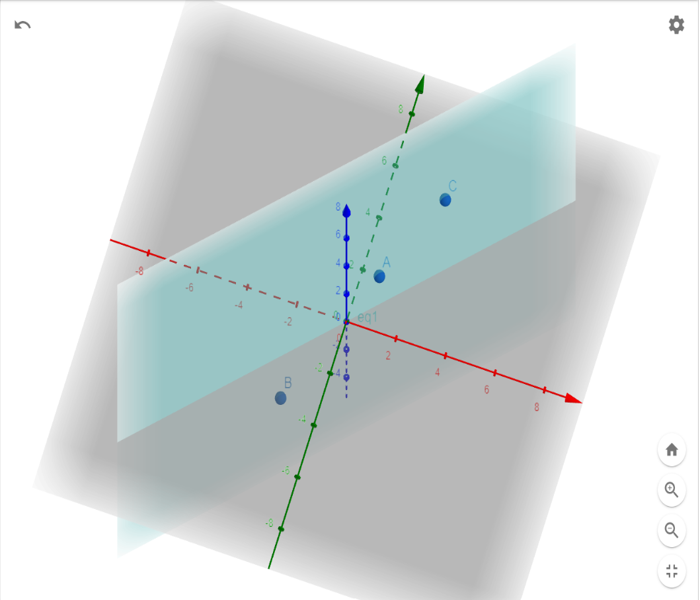

In [8]:
from PIL import Image
im = Image.open("img\plane_visualization.png")
im.resize((700,600))

Hence, in such case, it's better to take a look and solve by ourselves. Though the rref becomes "irregular", the plane actually gets simpler and easier to visualize. 

#### Bring it Together

Now we can combine what we've got so far into a single Python function.

In [9]:
def get_plane(p1, p2, p3):
    """
    Arguments: 
    p1, p2, p3 -- the three points in 3d plane, expressed in numpy array
    
    Returns:
    a, b, c -- the coefficients of the plane ax + by + cz + 1 = 0;
               returns -1 if the pivot columns are not the first three columns
    """
    # concatenate the numpy arrays to form a 3 by 4 coefficient matrix
    M = np.concatenate((np.array([p1,p2,p3]), np.ones((3,1), dtype=int)), axis=1)
    # convert to sympy matrix
    M = sympy.Matrix(M)
    
    # compute and print rref
    rref = M.rref()
    print("The rref matrix is:\n", rref)
    
    # compute the plane or suggest further manual analysis
    if rref[1] == (0,1,2):
        a, b, c = rref[0].col(-1)
        print("\nThe plane is: ({})x + ({})y + ({})z - 1 = 0".format(a, b, c))
    else:
        a, b, c = -1, -1, -1
        print("\nSpecial case, manual analysis needed.")
        
    return a, b, c

We can check the program by creating and running different set of points:

In [10]:
p1 = np.array([1,-2,4])
p2 = np.array([-2,5,-3])
p3 = np.array([2,-3,7])
get_plane(p1,p2,p3)
print("\n")

p4 = np.array([3,3,3])
p5 = np.array([1,-1,1])
p6 = np.array([-2,-2,-2])
get_plane(p4,p5,p6)
print("\n")

The rref matrix is:
 (Matrix([
[1, 0, 0, -7/3],
[0, 1, 0, -1/3],
[0, 0, 1,  2/3]]), (0, 1, 2))

The plane is: (-7/3)x + (-1/3)y + (2/3)z - 1 = 0


The rref matrix is:
 (Matrix([
[1, 0, 1, 0],
[0, 1, 0, 0],
[0, 0, 0, 1]]), (0, 1, 3))

Special case, manual analysis needed.




#### Extensions

There are some further extensions can be done to this program:

- If given four points $A,B,C,D$ in $\mathbb{R}^3$, we can determine whether they reside on the same plane. Namely, we first compute the plane determined by $A,B$ and $C$, and then plug in vertices of $D$ to see whether the equation holds true. 
- We can also extend our program into higher dimensions: we can modify it so that, given $n$ points in n-dimensional space, it can compute the $(n-1)$ dimensional hyperplane determined by these $n$ points.